In [178]:
# Ahmet Bilal Yildiz

# Agricultural Robot problem

def MW(farm, maxFarm, i, j):

  if maxFarm[i-1][j-1] != -1: #if the max weed of the current is already calculated return the value

    return maxFarm[i-1][j-1]

  elif i == 1 and j ==1:

    maxFarm[i-1][j-1] = farm[i-1][j-1] #if i and j = 1, then fill the cell 1 if weed occurs or 0 if weed does not occur
    return maxFarm[i-1][j-1]

  elif i == 1: #if i = 1, then just take the max of left cell
    maxFarm[i-1][j-1] = MW(farm, maxFarm,i, j-1) + farm[i-1][j-1]
    return maxFarm[i-1][j-1]

  elif j == 1: #if j = 1, then just take the max of the upper cell
    maxFarm[i-1][j-1] = MW(farm, maxFarm,i-1, j) + farm[i-1][j-1]
    return maxFarm[i-1][j-1]
    
  else:

     maxFarm[i-1][j-1] =  max(MW(farm, maxFarm, i, j-1), MW(farm, maxFarm, i-1, j)) + farm[i-1][j-1] # if i and j != 1, then fill the cell with maximum of upper and lefter cell + 1/0 whether weed exits or not
     return maxFarm[i-1][j-1]


def PF(farm, maxFarm):

  path_list = [];

  i = len(farm) 
  j = len(farm[0]) 

  if i == 0 or j == 0:
    print("Error: There is no cell in the farm")
  
  else:

    path_list.append((i,j))
    MW(farm, maxFarm, i, j) # MW fills all the maxFarm matrix with corresponding max weed values

    while not (i == 1 and j == 1):

      if i == 1: #if we are in the upper corner just take the max of left
        path_list.append((i,j-1))
        j = j-1

      elif j == 1:
        path_list.append((i-1,j))
        i = i-1

      elif MW(farm, maxFarm, i, j-1) > MW(farm, maxFarm, i-1, j):
        path_list.append((i,j-1))
        j = j-1

      else:
        path_list.append((i-1, j))
        i = i-1

    print("Path contains max number of weeds: ")
    for i in range(len(path_list)):
      print(path_list[len(path_list)-i-1])

def findPath(given_area):

  maxFarm =[[-1 for _ in range(len(given_area[0])) ] for _ in range((len(given_area)))] #initilaizing the maxFarm
  PF(given_area, maxFarm) #call the PF to find and return path


In [179]:
#benchmark suite for Correctness
import matplotlib.pyplot as plt
import numpy as np
import time

################# 
#blackbox testing
#--- eceptions ---
################# 

#1 an empty matrix
matrix1 = [[]]

#2 a matrix that consists only 1's
matrix2 = [
          [1,1,1],
          [1,1,1],
          [1,1,1]]

#3 a matrix that consists only 0's 
matrix3 = [
          [0,0,0],
          [0,0,0],
          [0,0,0]]

#4 a matrix that has 1xn structure
matrix4 = [[0,1,1,0,1,0]]

#5 a matrix that has nx1 structure

matrix5 = [[0],
           [1],
           [1],
           [0],
           [1]]

#################          
#whitebox testing
#################  


#6 a 5x6 matrix (the matrix in the homework document)
matrix6 = [
          [1, 0, 1, 0, 0, 0],
          [0, 1, 0, 1, 0, 0],
          [0, 1, 1, 0, 0, 0],
          [0, 0, 0, 0, 1, 0],
          [1, 0, 3, 0, 0, 1]]

#7 a 6x8 random matrix 
matrix7 = [
          [1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
          [0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
          [0, 0, 1, 1, 0, 1, 0, 0, 1, 1],
          [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
          [0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1]]
#8 a 15x10 matrix
matrix8 = [
          [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
          [0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
          [1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
          [1, 0, 1, 1, 0, 1, 0, 0, 1, 1],
          [1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
          [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
          [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
          [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
          [1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
          [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
          [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
          [0, 0, 1, 0, 0, 1, 1, 0, 1, 1],
          [1, 0, 0, 0, 1, 1, 1, 0, 1, 0],
          [1, 0, 1, 0, 1, 1, 1, 1, 1, 0],
          [0, 0, 1, 0, 1, 0, 1, 0, 1, 0]]

test_list = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8]

In [180]:
#testing Correctness
for i in range(len(test_list)):
  matrix = test_list[i]
  print("Test Case",i+1, ": " )
  findPath(matrix)


Test Case 1 : 
Error: There is no cell in the farm
Test Case 2 : 
Path contains max number of weeds: 
(1, 1)
(1, 2)
(1, 3)
(2, 3)
(3, 3)
Test Case 3 : 
Path contains max number of weeds: 
(1, 1)
(1, 2)
(1, 3)
(2, 3)
(3, 3)
Test Case 4 : 
Path contains max number of weeds: 
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
Test Case 5 : 
Path contains max number of weeds: 
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(5, 1)
Test Case 6 : 
Path contains max number of weeds: 
(1, 1)
(1, 2)
(2, 2)
(3, 2)
(3, 3)
(4, 3)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
Test Case 7 : 
Path contains max number of weeds: 
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(3, 10)
(4, 10)
(5, 10)
(6, 10)
Test Case 8 : 
Path contains max number of weeds: 
(1, 1)
(1, 2)
(2, 2)
(2, 3)
(2, 4)
(3, 4)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(5, 7)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(9, 9)
(10, 9)
(11, 9)
(12, 9)
(13, 9)
(14, 9)
(15, 9)
(15, 10)


In [181]:
#benchmark suite for Performance

#creating 5 random matrixes with different sizes and putting them to the performance_list
performance_list = []
for i in range(5):
  array = np.random.randint(2, size=(2 **(i+1), 2**(i+1)))
  performance_list.append(array)

#diplaying the performance_list
for i in range(len(performance_list)):
  print("performance matrix", i+1, "(",2 **(i+1), "x", 2**(i+1), ")", ":")
  print(performance_list[i])
  print()

performance matrix 1 ( 2 x 2 ) :
[[0 0]
 [1 0]]

performance matrix 2 ( 4 x 4 ) :
[[0 0 1 0]
 [1 1 0 0]
 [1 0 1 0]
 [1 0 0 1]]

performance matrix 3 ( 8 x 8 ) :
[[0 1 1 0 1 0 1 1]
 [0 1 0 1 1 0 1 1]
 [0 0 1 0 1 1 0 0]
 [0 0 0 0 0 1 1 1]
 [1 0 0 1 0 1 0 1]
 [0 0 0 1 0 1 0 0]
 [1 0 1 0 1 0 1 0]
 [1 0 0 0 0 1 1 1]]

performance matrix 4 ( 16 x 16 ) :
[[0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0]
 [0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1]
 [1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1]
 [1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0]
 [0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0]
 [1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1]
 [0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1]
 [0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0]
 [0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1]
 [0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0]]

performance matrix 5 ( 32 x 32 ) :
[[0 0 0 ... 1 0 1]
 [1 0 1 ... 0 1 0]
 [0 0 0 ... 0 0

In [187]:
#testing Performance #outputs 
#run all the matrixes and plot the graph of their running times
time_list =[]
for matrix in performance_list:
  t0= time.process_time()
  findPath(matrix)
  t1 = time.process_time() - t0
  time_list.append(t1)

input_list = [2,4,8,16,32]


Path contains max number of weeds: 
(1, 1)
(2, 1)
(2, 2)
Path contains max number of weeds: 
(1, 1)
(2, 1)
(2, 2)
(2, 3)
(3, 3)
(3, 4)
(4, 4)
Path contains max number of weeds: 
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 5)
(3, 5)
(3, 6)
(4, 6)
(5, 6)
(6, 6)
(6, 7)
(7, 7)
(8, 7)
(8, 8)
Path contains max number of weeds: 
(1, 1)
(1, 2)
(2, 2)
(3, 2)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(5, 7)
(6, 7)
(7, 7)
(7, 8)
(8, 8)
(9, 8)
(9, 9)
(10, 9)
(11, 9)
(12, 9)
(13, 9)
(14, 9)
(15, 9)
(15, 10)
(15, 11)
(15, 12)
(15, 13)
(15, 14)
(16, 14)
(16, 15)
(16, 16)
Path contains max number of weeds: 
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(4, 2)
(5, 2)
(6, 2)
(6, 3)
(7, 3)
(8, 3)
(8, 4)
(8, 5)
(9, 5)
(9, 6)
(10, 6)
(11, 6)
(12, 6)
(12, 7)
(12, 8)
(12, 9)
(12, 10)
(12, 11)
(12, 12)
(12, 13)
(12, 14)
(12, 15)
(13, 15)
(14, 15)
(14, 16)
(14, 17)
(14, 18)
(14, 19)
(15, 19)
(15, 20)
(15, 21)
(16, 21)
(17, 21)
(18, 21)
(19, 21)
(20, 21)
(21, 21)
(21, 22)
(22, 22)
(22, 23)
(22, 24)
(22, 25)
(22, 26)
(23, 26)
(23, 27)

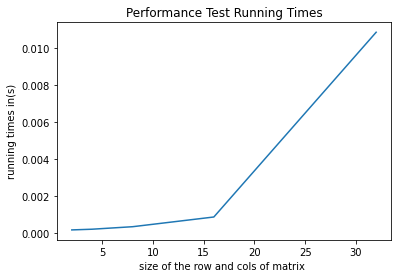

In [188]:
#performance test #plotting the graph
plt.plot(input_list, time_list)
plt.xlabel('size of the row and cols of matrix ')
plt.ylabel('running times in(s)')
plt.title('Performance Test Running Times')
plt.show()